In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
!pip install protobuf==3.20.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install onnxmltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import tensorflow as tf
import onnxmltools
import numpy as np
import matplotlib.pyplot as plt
import time
import yaml

In [14]:
!pip uninstall protobuf==3.19.6

Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/google/protobuf/*
    /usr/local/lib/python3.9/dist-packages/protobuf-3.20.3-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/protobuf-3.20.3.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled protobuf-3.20.3


# Конвертируем в onnx

In [8]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/neuro/model_GPU.h5')
model.summary()

onnx_model = onnxmltools.convert_keras(model) 

onnxmltools.utils.save_model(onnx_model, '/content/gdrive/MyDrive/neuro/onnx_model.onnx')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1280)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 5)                 57605     
                                                                 
Total params: 4,107,176
Trainable params: 4,065,153
Non-trainable params: 42,023
_________________________________________________________________


# Загружаем модель в оннх формате

In [12]:
!pip install onnxruntime
import onnxruntime as ort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 6.5 MB/s eta 0:00:00


In [30]:
# Load the ONNX model
model_path = '/content/gdrive/MyDrive/neuro/onnx_model.onnx'
sess = ort.InferenceSession(model_path)

# Prepare input data
input_name = sess.get_inputs()[0].name
input_shape = sess.get_inputs()[0].shape
print('unput name:', input_name, 'input shape:', input_shape)
input_data = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Run inference
output_name = sess.get_outputs()[0].name

onnx_inf_start = time.time()
output = sess.run([output_name], {input_name: input_data})
onnx_inf_time = time.time() - onnx_inf_start

print(output)

unput name: efficientnetb0_input input shape: ['unk__2527', 224, 224, 3]
[array([[3.3829987e-02, 4.1572363e-03, 8.6893409e-01, 3.3750226e-07,
        9.3078397e-02]], dtype=float32)]


РАБОТАЕТ АОАОАОАОЫЫ

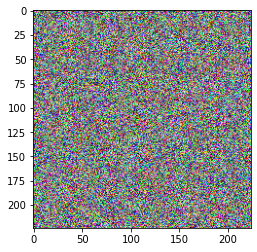

In [20]:
input1 = np.squeeze(input_data)
plt.imshow(input1)

In [26]:
!touch /content/gdrive/MyDrive/neuro/onnx_inference_time.yaml
onnx_yaml = '/content/gdrive/MyDrive/neuro/onnx_inference_time.yaml'

In [31]:
with open(onnx_yaml, 'w') as file:
  yaml.dump({'inference_time' : onnx_inf_time}, file)

In [32]:
print(open(onnx_yaml).read())

inference_time: 0.053781986236572266

